In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/smsspamcollection (1).tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
len(df)

5572

In [ ]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


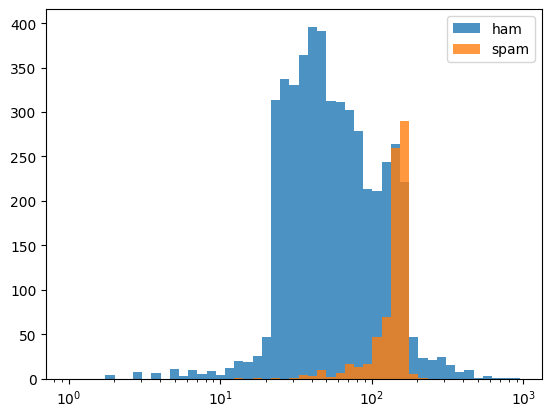

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
df['punct'].describe()

,punct
count,5572.000000
mean,4.177495
std,4.623919
min,0.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,133.000000


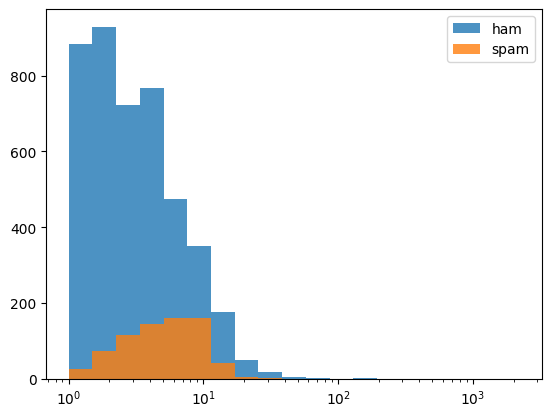

In [ ]:
plt.xscale('log')
bins = 1.5**(np.arange(0, 20))
plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
x = df[['length', 'punct']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

print('training Data shape:',x_train.shape)
print('testing Data shape:',x_test.shape)

training Data shape: (3900, 2)
testing Data shape: (1672, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics

# create a prediction set:
predictions = lr_model.predict(x_test)

# print the confusion matrix:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [ ]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham', 'spam'], columns=['ham', 'spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [ ]:
# print a classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [ ]:
# print overall accurecy
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
predictions = nb_model.predict(x_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(gamma='auto')
svm_model.fit(x_train, y_train)

SVC(gamma='auto')

In [ ]:
predictions = svm_model.predict(x_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1373   75]
 [ 121  103]]


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [ ]:
print(metrics.accuracy_score(y_test, predictions))

0.8827751196172249
